In [1]:
from fastai.text import *
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import pickle
import sentencepiece as spm
import re
import pdb

In [2]:
import fastai, torch
fastai.__version__ , torch.__version__

('1.0.50.post1', '1.0.0')

In [3]:
torch.cuda.set_device(0)

In [4]:
df = pd.read_csv('Tamil_News_Classification_3class.csv', sep=',', encoding='utf-8')
df.head()

,text,label
0,'ஹர ஹர மஹாதேவகி' படத்தின் பத்திரிகையாளர் காட்ச...,tamil-cinema
1,கடந்த ஆண்டு இலக்கியப் படைப்புகளுக்கு அதிக நேரம...,tamil-cinema
2,பாலாவின் 'நாச்சியார்' பிப்ரவரி 9-ம் தேதி வெளிய...,tamil-cinema
3,"அதிர்ஷ்டமான தேதிகள்: பிப்ரவரி 9, 15 (பிற்பகல்)",spirituality
4,"ஆழ்வார்கள், ஆச்சாரியர்கள் தரிசித்து, பாடல் பெற...",spirituality


In [5]:
class TamilTokenizer(BaseTokenizer):
    def __init__(self, lang:str):
        self.lang = lang
        self.sp = spm.SentencePieceProcessor()
        self.sp.Load(str('tamil_spm_8k.model'))
        
    def tokenizer(self, t:str) -> List[str]:
        return self.sp.EncodeAsPieces(t)

In [6]:
sp = spm.SentencePieceProcessor()
sp.Load('tamil_spm_8k.model')
itos = [sp.IdToPiece(int(i)) for i in range(8000)]

In [7]:
tamil_vocab = Vocab(itos)

In [8]:
tokenizer = Tokenizer(tok_func=TamilTokenizer, lang='ta')

In [9]:
path = Path('.')

In [10]:
label_cols = [1]

In [11]:
data_lm = TextLMDataBunch.from_csv(path=path, csv_name='Tamil_News_Classification_3class.csv', text_cols=[0], label_cols=label_cols, tokenizer=tokenizer, vocab=tamil_vocab)

In [12]:
data_lm.save()

In [13]:
bs=32

In [14]:
data_lm.show_batch()

idx,text
0,யில் ▁பல ▁இறுதி ப் ▁பாசு ர ங்களில் ▁‘ கு று கூர் ச் ▁ச ட கோ பன் ’ ▁என்றே ▁தன் ▁பெயரை க் ▁ குறிப்பிடுகிறார் . ▁ x x b os ▁இதே போல ▁ரெ னால் ட் ▁நிறுவனம் ▁தனது ▁ க் வி ட் ▁மார் வெல் ▁சிறப்பு ▁பதிப்பு ▁கார் ▁குறித்த ▁விமர்சன ங்களை ▁இளைஞர் களைக் ▁க வரும் ▁வகையில் ▁பதிவு ▁செய்த ிருந்தது . ▁சா க ச ப் ▁பிரி யர் களைக் ▁க வரும் ▁வகையில் ▁நிகழ்ச்சி க்கு
1,"▁மாத வ னின் ▁தந்தை ▁டெல்லி ▁குமார ிடம் ▁தொழில ாளி யாக ▁வேலை ▁பார்த்த வர் . ▁இவர்கள் ▁இரு வர் ▁குடும்பத்தினர ும் ▁மாத வன் , ஜோ தி கா விற்கு த் ▁திருமணம் ▁செய்ய ▁முடிவு ▁செய்கின்றன ர் . ▁ x x b os ▁மத்திய ▁அரசால் ▁நிர்வாக ிக்க ப்படும் ▁தணிக்கை க்குழு ▁அதற்கான ▁சட்ட ▁திட்ட ங்களுக்கு ▁உட்பட்ட ு ▁அனுமதி ய ளித்த ▁பின் ▁வெளியிட ப்படும் ▁திரைப்பட ங்களை ▁தனி ▁நபர் களின் ▁விமர்சன ங்களுக்காக ▁மாற்ற ிய மை ப்ப தோ"
2,"யாக ▁விழுந்த ார் . ▁அவரது ▁சி ரம் ▁துறவி யின் ▁கால ில் ▁பட்ட து . ▁துறவி ▁தமது ▁கை களை ▁உயர் த்தி ▁மன்னன ை ▁ஆ சி ர் வதி த்தார் . ▁ x x b os ▁5 ஜி ▁தொழில்நுட்ப த்துக்கான ▁இந்த ▁குழு ▁அமைச்ச க ங்களின் ▁செயல ர் களை ▁உள்ளடக்கிய தாக ▁இருக்கும் . ▁குறிப்பாக ▁தொலை த் ▁தொடர்பு ▁செயல ர் , ▁மின்னணு ▁மற்றும் ▁தகவல் ▁தொழில்நுட்ப ம் , ▁அறிவியல் ▁மற்றும் ▁தொழில்நுட்ப ▁அமைச்ச க ▁செயல ர்கள்"
3,"து பதி ▁அடுத்தடுத்த ு ▁' சூ ப்பர் ▁டீ ல க்ஸ் ' , ▁' 69 ' , ▁' சீ த க்கா தி ' ▁உள்ளிட்ட ▁பட ங்களிலும் ▁நடித்து ▁வருவது ▁குறிப்பிடத்தக்க து . ▁ x x b os ▁பேச்சுவார்த்தை ▁நடக்கிறது . ▁அ னே க மாக , ▁அடுத்த ▁பட மும் ▁சமூக ▁சிந்தனை ▁நி ரம்ப ிய தாக வே ▁இருக்கும் . ▁இனி ▁வரும் ▁என் ▁எல்லா ▁பட ங்களி லு மே ▁திரைக்கதை யில் ▁உரையாட ல் , ▁கதாபாத்திர"
4,ப்பட்டுள்ள தாக ▁அ மல ாக்க த்துறை ▁அறிவித்த ுள்ளது . ▁தலை மறை வா கி ▁இருக்கும் ▁நி ர வ் ▁மோ டி யை ▁சி பி ஐ ▁தேடி ▁வருவது ▁குறிப்பிடத்தக்க து . ▁ x x b os ▁அம்மா ▁பாத்திர த்துக்கு ▁உ ங்களை ▁எப்படி ▁த யார் படுத்தி க் ▁கொண்ட ீர் கள் ? ▁ x x b os ▁பெண்களுக்கு ▁அ க்கம் பக்க த்தினர ுடன் ▁இருந்து ▁வந்த ▁மன வரு த்தம் ▁நீங்க ும் . ▁சொன்ன ▁சொல்ல ை


In [15]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3, pretrained=False)

In [16]:
!ls

data_save.pkl
models
Tamil_News_Classification_3class.csv
Tamil_News_Classification_4class.csv
Tamil News Classifier Four Class Data.ipynb
Tamil News Text Classifier Three Class.ipynb
tamil_spm_8k.model
tamil_spm_8k.vocab


In [17]:
learn.load('wikitalm_8k_447_third')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (5347 items)
x: LMTextList
▁ x x b os ▁அரியலூர் ▁மாணவ ி ▁அ னி தா வின் ▁தற்கொலை க்கு ▁காரண மான ▁நீ ட் ▁தேர் வை ▁கொண்டு ▁வந்த ▁மத்திய ▁அரசு க்கும் , ▁அதை ▁கண்டு ம் ▁காண ாமல் ▁விட்ட ▁மாநில ▁அரசு க்கும் ▁கண்ட னம் ▁தெரிவித்த ு ▁திரையுலக ினர் ▁தொடர்ந்து ▁தங்கள் ▁கருத்து களைப் ▁பதிவு செய் து ▁வருகின்றனர் .,▁ x x b os ▁நகரின் ▁பழைய ▁பெயர் ▁திரு க்கு ரு கூர் . ▁நம் ம ாழ்வார் ▁தம் ▁திரு வாய் மொழி யில் ▁பல ▁இறுதி ப் ▁பாசு ர ங்களில் ▁‘ கு று கூர் ச் ▁ச ட கோ பன் ’ ▁என்றே ▁தன் ▁பெயரை க் ▁ குறிப்பிடுகிறார் .,▁ x x b os ▁இதே போல ▁ரெ னால் ட் ▁நிறுவனம் ▁தனது ▁ க் வி ட் ▁மார் வெல் ▁சிறப்பு ▁பதிப்பு ▁கார் ▁குறித்த ▁விமர்சன ங்களை ▁இளைஞர் களைக் ▁க வரும் ▁வகையில் ▁பதிவு ▁செய்த ிருந்தது . ▁சா க ச ப் ▁பிரி யர் களைக் ▁க வரும் ▁வகையில் ▁நிகழ்ச்சி க்கு ▁ஏற்பாடு ▁செய்த ிருந்தது . ▁இது ▁இன் ஸ்டா ▁கிராம ில் ▁வெளியானது .,▁ x x b os ▁தமிழில் ▁ச ன்னி லியோ ன் ▁அறிமுக மாகும் ▁' வீர மா தேவி ',▁ x x b os ▁ ப் ரிய தர் ஷன் ▁இயக்கத்தில் ▁உருவாகிய ுள்ள ▁' நி மி ர் ' ▁படத்

In [18]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


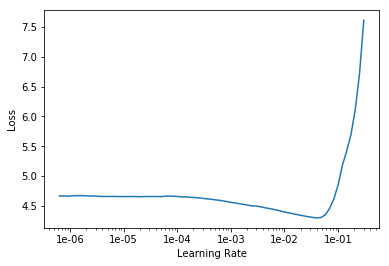

In [19]:
learn.recorder.plot()

In [20]:
learn.freeze()

In [21]:
learn.fit_one_cycle(1, 5e-2, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.042740,3.715982,0.372640,00:20


In [22]:
learn.save('fit_head', with_opt=True)

In [23]:
learn.load('fit_head', with_opt=True);

In [24]:
learn.unfreeze()

In [25]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.425970,3.668674,0.378093,00:25
1,3.356874,3.576308,0.389238,00:25
2,3.250970,3.510751,0.397608,00:25
3,3.123372,3.472193,0.404273,00:25
4,2.983011,3.459617,0.408498,00:25
5,2.858832,3.454983,0.410427,00:25
6,2.749488,3.462519,0.411464,00:25
7,2.673619,3.468269,0.412436,00:25
8,2.620757,3.472952,0.412245,00:25


KeyboardInterrupt: 

In [26]:
learn.save('fine_tuned', with_opt=True)

In [27]:
learn.load('fine_tuned', with_opt=True);

In [32]:
learn.predict('▁தனது ▁சொந்த',n_words=10)

'▁தனது ▁சொந்த ▁ஊரில் ▁நடக்கும் ▁ஆ ட்டோ மொ பை ல் ▁கண்காட்சி யில் ▁அதிக'

In [33]:
learn.save_encoder('fine_tuned_enc')

In [34]:
data_clas = TextClasDataBunch.from_csv(path=path, csv_name='Tamil_News_Classification_3class.csv', tokenizer=tokenizer, vocab=tamil_vocab, text_cols=[0], label_cols=label_cols)

In [35]:
data_clas.show_batch()

text,target
"▁ x x b os ▁நடிகர் ▁ச சி குமார் ▁மிகவும் ▁சிறந்த ▁இயக்குநர் ▁மற்றும் ▁நல்ல ▁மனிதர் . ▁அவரது ▁உறவினர் ▁அ சோ க்கு மர் ▁தற்கொலை யை ▁நினைத்த ு ▁நான் ▁மிகவும் ▁மன வே தனை ப்படுகிற ேன் . ▁அசோக ் குமார் ▁தனது ▁மனைவி , ▁பெற்றோர் ▁மற்றும் ▁குழந்தை களை ▁தவ ிக்க விட்டு விட்டு ▁தற்கொலை ▁செய்யும் ▁முடி வை ▁தவிர ் த்த ிருக்க ▁வேண்டும் . ▁ ta m il - c ine ma | ந டி கை",tamil-cinema
"▁ x x b os ▁மி ட் கே ப் ▁பங்கு களின் ▁வர்த்தக ம் ▁நே ற்று ▁இதுவரை ▁இல்லாத ▁வகையில் ▁ஏற்ற த்தைச் ▁சந்தித்த ன . ▁நே ற்றை ய ▁தினசரி ▁வர்த்தக த்தில் ▁பே ஜ் ▁இ ண்ட ஸ்ட் ரீ ஸ் ▁( 8 . 67 % ), ▁ஜி ண்டா ல் ▁ஸ்டீ ல் ▁( 6 . 45 % ) ▁யூனியன் ▁பே ங்க் ▁( 4 . 2% ), ▁அ தானி ▁எ ண்டர் பி ரை ஸ ஸ் ▁(",business
"▁ x x b os ▁அமைதி யாக ▁இருந்து ▁' வெ டி க்கும் ' ▁நிதி ன் ▁சத்ய ா , ▁' சொ த ப்ப ல் ' ▁பிரே ம் ஜி ▁அமர ன் , ▁' உ ல் டா ' ▁அ ஜ ய் ▁ராஜ் , ▁சர் ப் ரை ஸ் ▁இனி கோ வின் ▁வருகை , ▁க ற ார் ▁விஜய லட்சுமி ▁ஆகியோர் ▁படத்தின் ▁சு வார ஸ் ய த்துக்கு ▁உதவ ுகிறார்கள் . ▁டி . சி வா , ▁சு",tamil-cinema
"▁ x x b os ▁அவர் ▁என்ன ▁ஜா தி . ▁அது ▁முக்கிய மே ▁இல்லை . ▁அவ்வ ளவு ▁ஏ ன் . . . ▁உயிர ுக்குப் ▁போராட ிக் ▁கொண்டிருக்கும் ▁அந்த ▁நபர் , ▁நல்ல வ ரா ▁கெ ட்ட வ ரா . . . ▁அவசிய மே ▁இல்லை . ▁பாலின மோ ▁பெயர ோ ▁ஜா தி ▁மத மோ , ▁நல்ல வர் ▁கெ ட்ட வர் ▁குண ாதி ச ய ங்கள ோ ▁அவசிய மே ▁இல்லை . ▁முதலில் ▁அவர்",spirituality
"▁ x x b os ▁கி றி ஸ் து ம ஸ் ▁தா த்தா , ▁அவர் ▁தரும் ▁கி றி ஸ் து ம ஸ் ▁பரிசு , ▁கி றி ஸ் து ம ஸ் ▁ஸ்டார் , ▁கி றி ஸ் து ம ஸ் ▁வாழ் த்து ▁அட்டை , ▁கி றி ஸ் து ம ஸ் ▁குடி ல் , ▁கி றி ஸ் து ம ஸ் ▁கே க் ▁போலவே ▁கி றி ஸ் து ம ஸ் ▁மர மும் ▁கி றி",spirituality


In [36]:
data_clas.sanity_check()

In [37]:
data_clas.save('data_clas.pkl')

In [38]:
bs=32
data_clas = load_data(path, 'data_clas.pkl', bs=bs)

In [39]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')

In [40]:
learn.freeze()

In [41]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


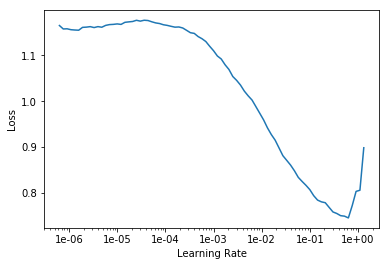

In [42]:
learn.recorder.plot()

In [43]:
learn.loss_func.func

CrossEntropyLoss()

In [44]:
kappa = KappaScore()

In [45]:
learn.metrics = [kappa, accuracy]

In [46]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,kappa_score,accuracy,time
0,0.332072,0.167326,0.917669,0.946148,00:31


In [47]:
learn.save('first-full')

In [48]:
learn.load('first-full');

In [49]:
learn.freeze_to(-2)
learn.fit_one_cycle(5, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,kappa_score,accuracy,time
0,0.289393,0.158559,0.914040,0.943904,00:36
1,0.236703,0.137950,0.923113,0.949888,00:34
2,0.197404,0.110904,0.939548,0.960359,00:35
3,0.129235,0.097855,0.952144,0.968586,00:34
4,0.095978,0.092282,0.950921,0.967838,00:36


In [50]:
learn.save('final')

In [51]:
learn.predict('திருக்காஞ்சியில் ஸ்ரீ கங்கைவராக நதீஸ்வரர் ஆலயம் அமைந்துள்ளது.')[0]

Category spirituality

In [52]:
learn.predict('கீழ்த்திசை ஞானியர் குழந்தை இயேசுவைக் கண்டு வணங்கிய நிகழ்வை')[0]

Category spirituality

In [53]:
learn.predict("தர்காவுக்கு அருகிலேயே ஒரு பள்ளிவாசல் இருக்கிறது. உள்ளூர் மக்களும், தர்காவுக்கு வரும் வெளியூர் அன்பர்களும் அங்கு தொழுகிறார்கள்.")[0]

Category spirituality

In [54]:
learn.predict('இப்படத்தில் இன்னொரு நாயகனாக நாகார்ஜூனா நடிக்கவிருக்கிறார் என்றவுடன் உடனே இப்படத்தை ஒப்புக் கொண்டேன். அவருடைய பெரிய ரசிகன் நான்')[0]

Category tamil-cinema

In [55]:
learn.predict('ஒரு தொலைக்காட்சியில் ஒரு நடிகை தன்னுடைய நாடகங்களில் நடிக்கிறார் என்றால், மற்ற தொலைக்காட்சியில் நடிக்கக் கூடாது, ஷோவிற்கு போகக் கூடாது என்று கையெழுத்து வாங்கிக் கொள்கிறார்கள்.')[0]

Category tamil-cinema

In [57]:
learn.predict('இயக்குநர் ஷங்கர் - ரஜினிகாந்த் இணையின் 2.0 படத்தின் படப்பிடிப்பு மும்முரமாக நடைபெற்றுவருகிறது.')[0]

Category tamil-cinema

In [58]:
learn.predict('அருகில் இருங்காட்டுக் கோட்டையில் செயல்படும் ஹூண்டாய் நிறுவனம் இது போன்ற ஹீட் அலவன்ஸை பணியாளர்களுக்கு அளிக்கிறது. ஊழியர்கள் விடுத்த கோரிக்கையை ரெனால்ட் நிசான் நிர்வாகம் பரிசீலித்து வருவதாகத் தெரிகிறது.')[0]

Category business

In [59]:
learn.predict('சர்வதேச சந்தையில் கச்சா எண்ணெய் விலை அதிகரித்து வருவதால் முதலீட்டாளர்கள் கவனம் அதன் பக்கம் திரும்பியுள்ளது.')[0]

Category business

In [60]:
learn.predict('மேடிசன் ஸ்போர்ட்ஸ் குழுமத்தின் இயக்குநர் பொறுப்பில் இருந்தவர். இன்ச்கேப் நிறுவனத்தின் பொறுப்புகள் அல்லாத இயக்குநர் பொறுப்பில் இருந்தவர்.')[0]

Category business